##### Lung cancer prediction using 10 machine learning classification models using Scikit-learn library in Python is a code implementation that aims to develop a predictive model for detecting lung cancer in patients. The code uses 10 different machine learning algorithms, including logistic regression, decision tree, k-nearest neighbor, Gaussian naive Bayes, multinomial naive Bayes, support vector classifier, random forest, XGBoost, multi-layer perceptron, and gradient boosting classifier, to predict the likelihood of lung cancer based on a range of variables. The dataset used in the code includes various columns such as gender, age, smoking, yellow fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol consuming, coughing, shortness of breath, swallowing difficulty, chest pain, and lung cancer. By analyzing these variables and using machine learning algorithms to identify patterns and correlations, the predictive models can provide accurate assessments of a patient's risk of developing lung cancer.####

# **Lung Cancer Prediction Using 10 models**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('your_file.csv.xls')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


**Note: In this dataset, YES=2 & NO=1**

In [6]:
df.shape

(309, 16)

In [7]:
#Checking for Duplicates
df.duplicated().sum()

33

In [8]:
#Removing Duplicates
df=df.drop_duplicates()

In [9]:
#Checking for null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.**

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [ ]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

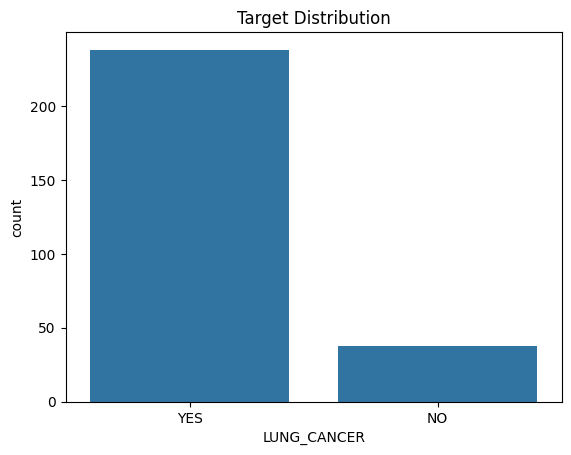

In [11]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

##### ***That is, Target Distribution is imbalanced.***

In [12]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,238
NO,38


***We will handle this imbalance before applyig algorithm.***

**Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..**

In [13]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

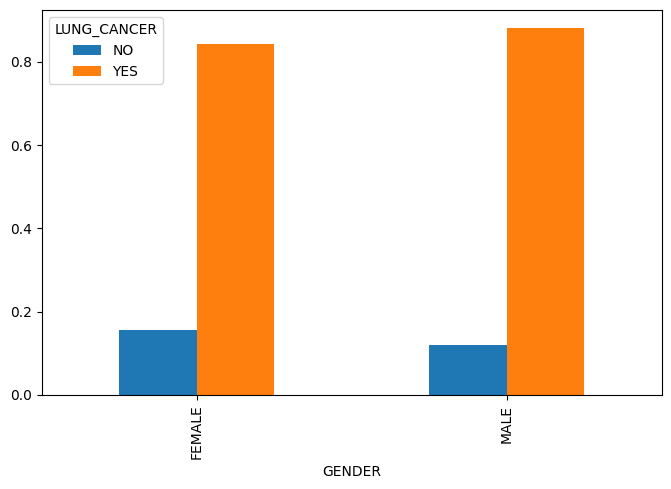

In [14]:
plot('GENDER')

<Axes: xlabel='AGE'>

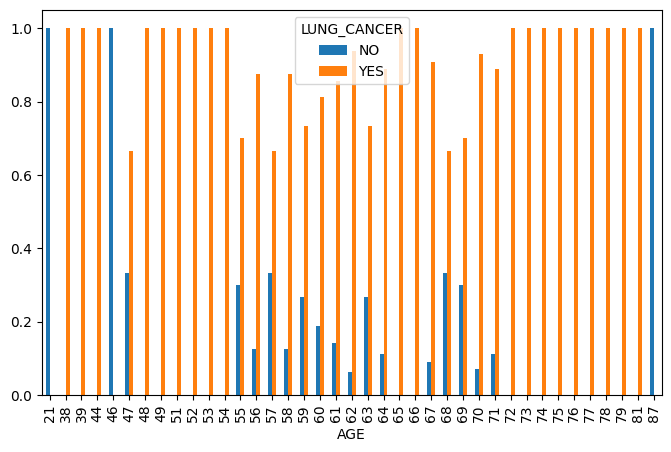

In [15]:
plot('AGE')

<Axes: xlabel='SMOKING'>

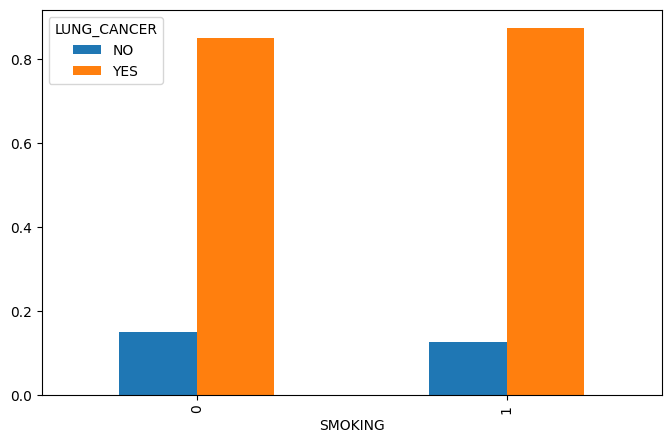

In [16]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

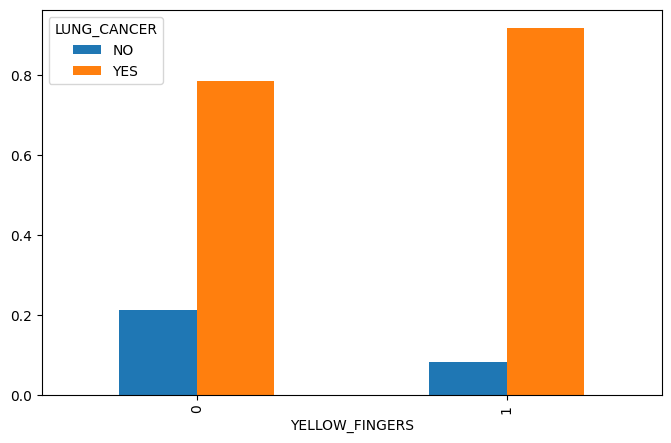

In [17]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

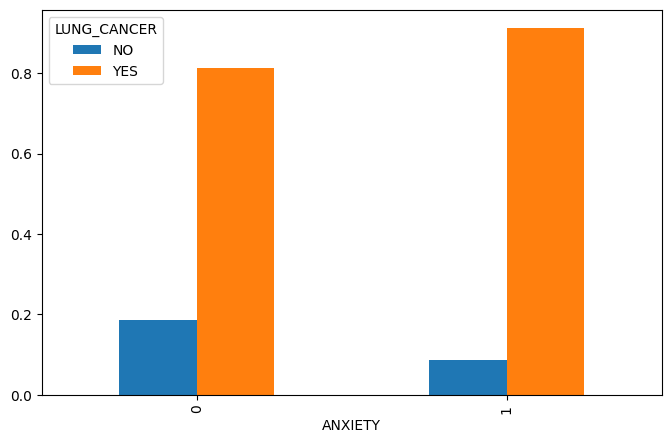

In [18]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

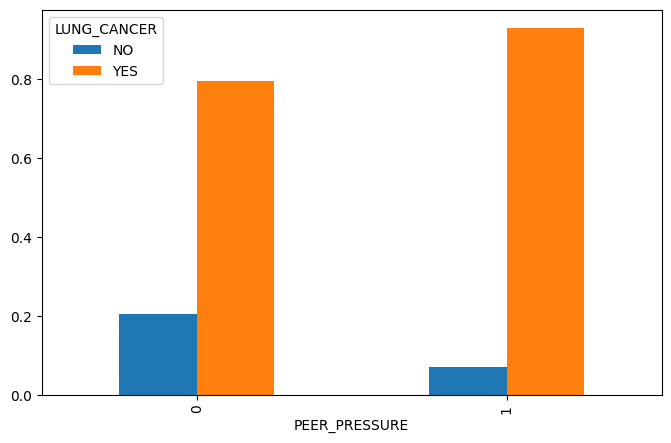

In [19]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

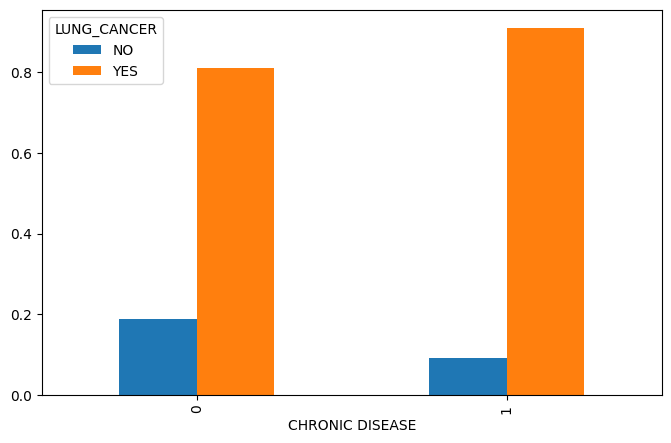

In [20]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

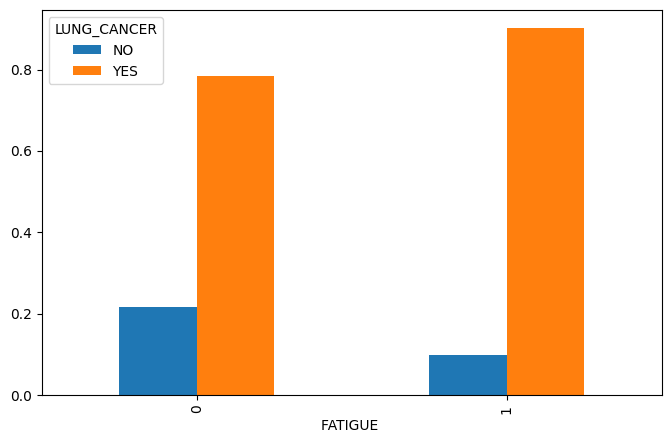

In [21]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

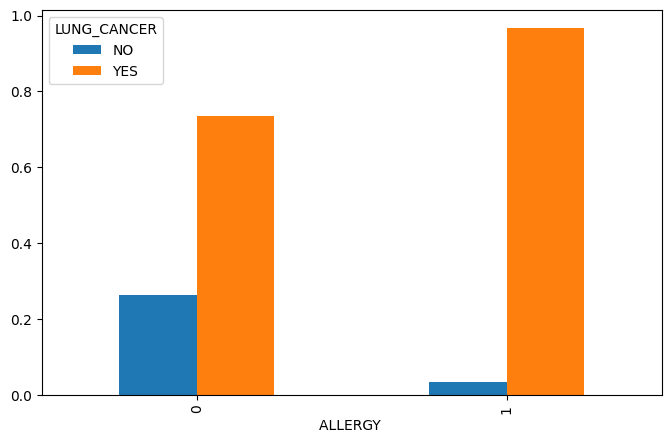

In [22]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

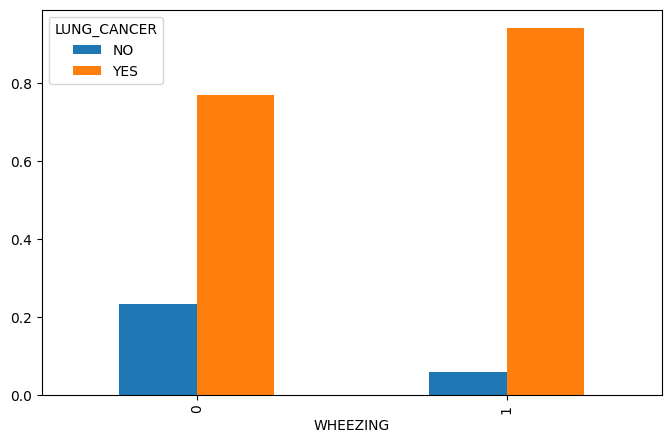

In [23]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

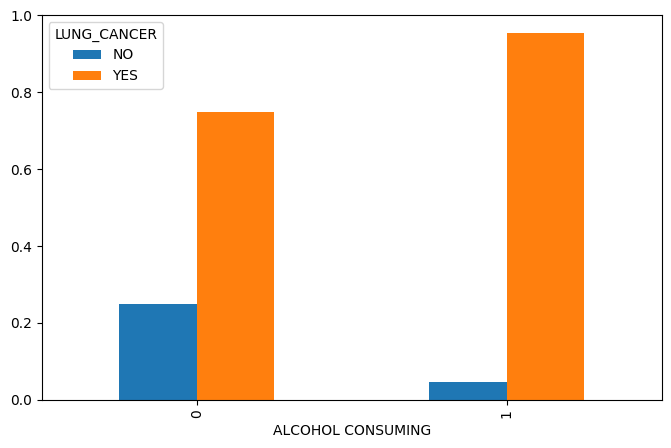

In [24]:
plot('ALCOHOL CONSUMING')

<AxesSubplot:xlabel='COUGHING'>

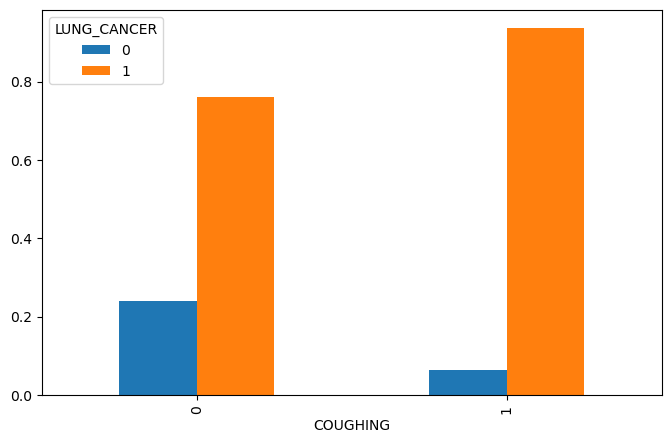

In [ ]:
plot('COUGHING')

<AxesSubplot:xlabel='SHORTNESS OF BREATH'>

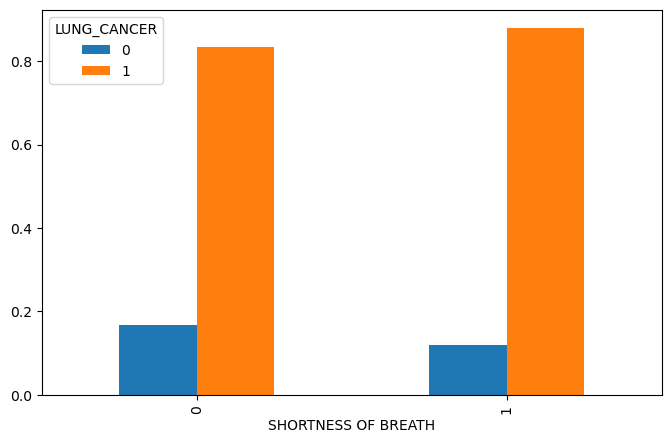

In [ ]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

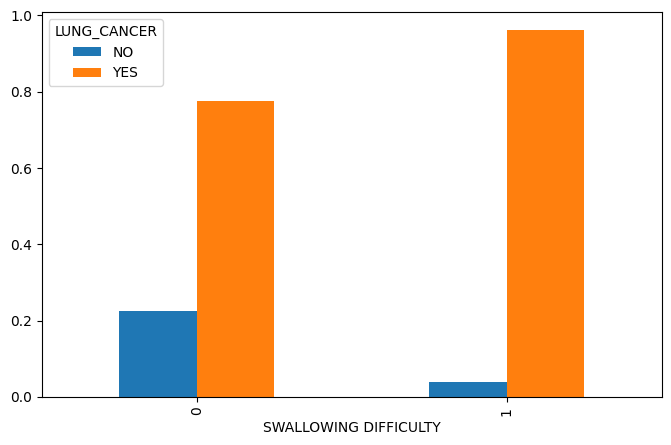

In [26]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

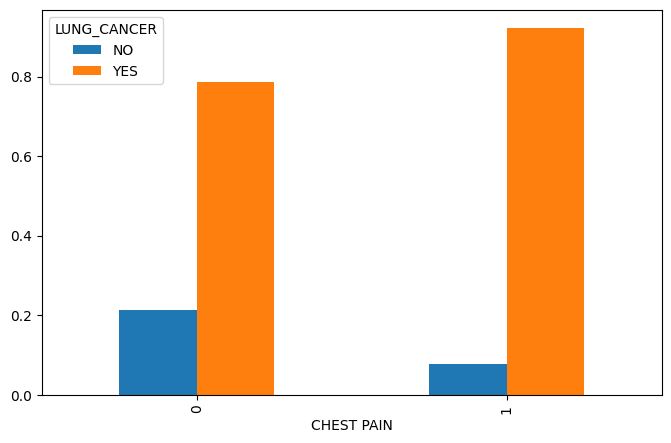

In [25]:
plot('CHEST PAIN')

**From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.**

In [27]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,YES
1,0,0,0,1,1,1,0,0,0,1,1,YES
2,0,0,1,0,1,0,1,0,1,0,1,NO
3,1,1,0,0,0,0,0,1,0,1,1,NO
4,1,0,0,0,0,0,1,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,YES
280,0,0,0,1,1,1,0,0,0,0,0,NO
281,0,0,0,0,1,1,0,0,0,0,1,NO
282,1,1,0,0,0,0,0,0,0,1,1,NO


**CORRELATION**

# ***Feature Engineering***

Feature Engineering is the process of creating new features using existing features.

***The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.***

In [33]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,YES,1
1,0,0,0,1,1,1,0,0,0,1,1,YES,0
2,0,0,1,0,1,0,1,0,1,0,1,NO,0
3,1,1,0,0,0,0,0,1,0,1,1,NO,1
4,1,0,0,0,0,0,1,0,1,0,0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,YES,1
280,0,0,0,1,1,1,0,0,0,0,0,NO,0
281,0,0,0,0,1,1,0,0,0,0,1,NO,0
282,1,1,0,0,0,0,0,0,0,1,1,NO,1


In [34]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

# ***Target Distribution Imbalance Handling***

In [35]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [ ]:
len(X)

477

# **Logistic Regression**

In [36]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [37]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array(['YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO'],
      dtype=object)

In [39]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

          NO       0.96      1.00      0.98        64
         YES       1.00      0.95      0.97        56

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



**This model is almost 97% accurate.**

# **Decision Tree**

In [40]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array(['YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO'],
      dtype=object)

In [42]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

          NO       0.93      0.97      0.95        64
         YES       0.96      0.91      0.94        56

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



**This model is 94% accurate.**

# **K Nearest Neighbor**

In [43]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array(['YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO'],
      dtype=object)

In [45]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

          NO       0.93      1.00      0.96        64
         YES       1.00      0.91      0.95        56

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



**This model is 96% accurate.**

# **Gaussian Naive Bayes**

In [46]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [47]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array(['YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO'],
      dtype='<U3')

In [48]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

          NO       0.95      0.89      0.92        64
         YES       0.88      0.95      0.91        56

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



**This model is 92% accurate.**